In [72]:
import numpy as np
from scipy.io import loadmat
import h5py
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
%matplotlib notebook

# Load data

In [2]:
hf = h5py.File('/media/maria/DATA1/Documents/ZebraFish/subject_1/TimeSeries.h5', 'r')
neural_dat=np.array(hf['CellResp'])

In [3]:
print(neural_dat.shape)

(2880, 83205)


In [8]:
random_neurons=np.random.choice(range(0,neural_dat.shape[1]),100,replace=False)
small_neural_dat=neural_dat[:,random_neurons]
print(small_neural_dat.shape)
del neural_dat

(2880, 100)


# Calculate covariance matrix

In [10]:
cov=np.cov(small_neural_dat.T)
print(cov.shape)

(100, 100)


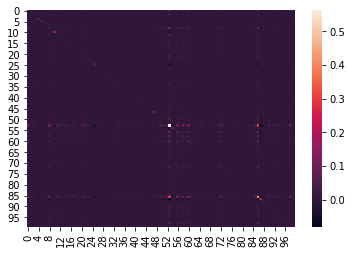

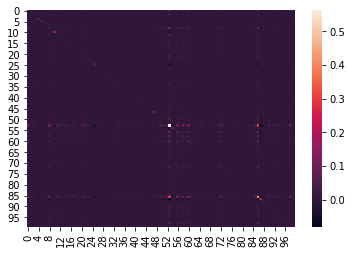

In [12]:
import seaborn as sns
sns.heatmap(cov)
plt.show()
#sns.heatmap(cov.T)

# Decompose covariance matrix

[[ 1.13513288e-01  3.76000516e-04  1.06395316e-02 ... -1.42277238e-03
   4.57251957e-02  7.11805745e-04]
 [ 3.76000516e-04  3.89590417e-03 -6.12757837e-05 ...  1.80517947e-04
   4.76320783e-04  4.45915488e-05]
 [ 1.06395316e-02 -6.12757837e-05  9.79817470e-03 ... -5.34335255e-04
   4.33294006e-03 -4.28236793e-06]
 ...
 [-1.42277238e-03  1.80517947e-04 -5.34335255e-04 ...  9.53168526e-03
  -8.75617547e-05 -6.73505192e-05]
 [ 4.57251957e-02  4.76320783e-04  4.33294006e-03 ... -8.75617547e-05
   2.37108846e-02  4.90217127e-04]
 [ 7.11805745e-04  4.45915488e-05 -4.28236793e-06 ... -6.73505192e-05
   4.90217127e-04  4.15685974e-03]]


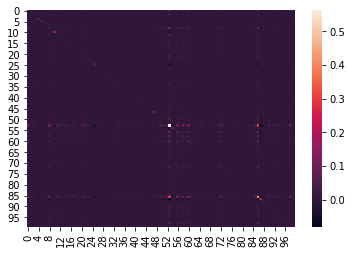

In [17]:
from numpy import linalg as lg

eigenvalues, eigenvectors = lg.eigh(cov)
Lambda = np.diag(eigenvalues)

decomp=c

sns.heatmap(decomp)
print(decomp)

In [38]:
print(eigenvalues.shape)
print(eigenvectors.shape)
eigenvectors[:,0].shape
eigenvalues[99]

(100,)
(100, 100)


1.0485892000128625

(100, 100)


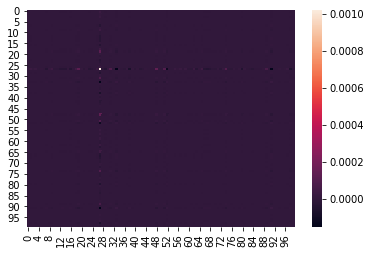

In [33]:
one_piece=eigenvalues[0]*np.outer(eigenvectors[:,0].reshape(1,-1),eigenvectors[:,0].reshape(-1,1).T)
print(one_piece.shape)
sns.heatmap(one_piece)


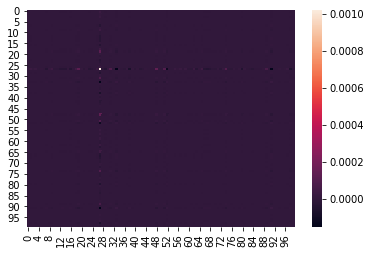

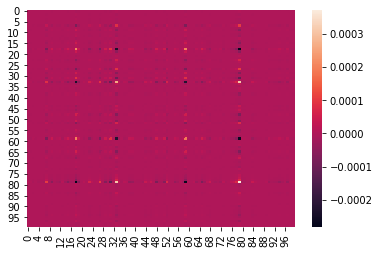

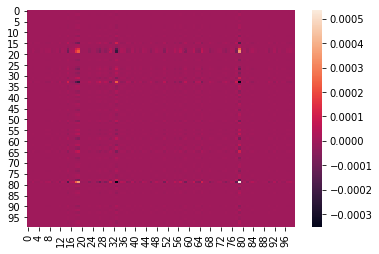

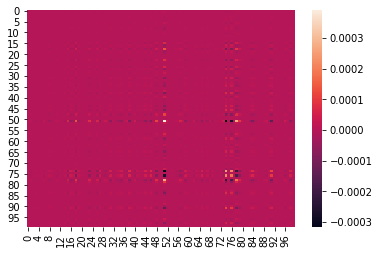

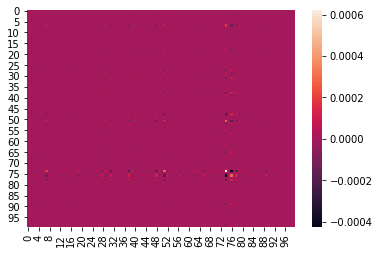

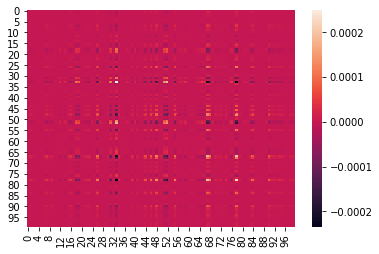

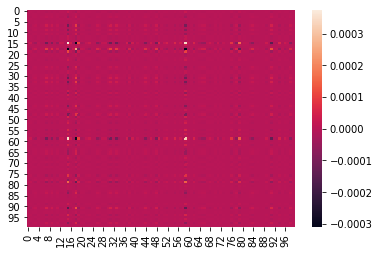

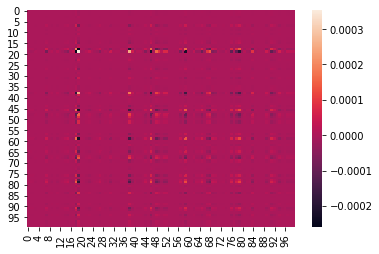

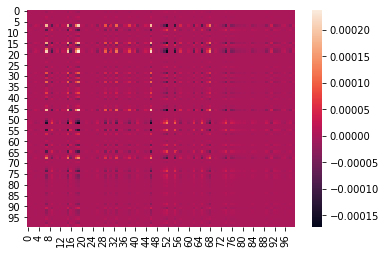

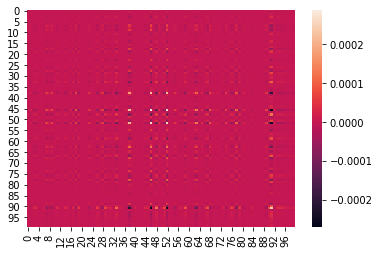

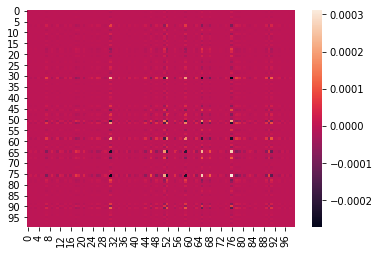

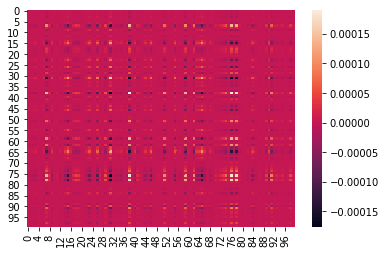

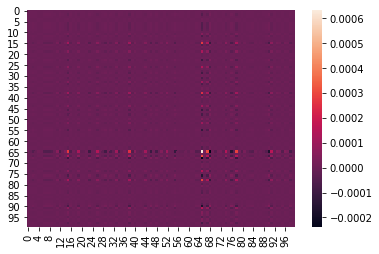

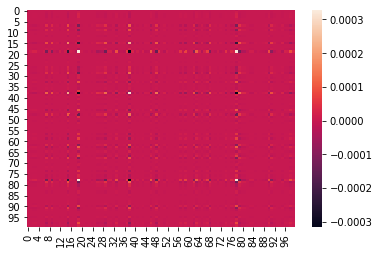

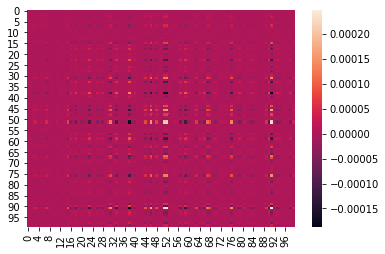

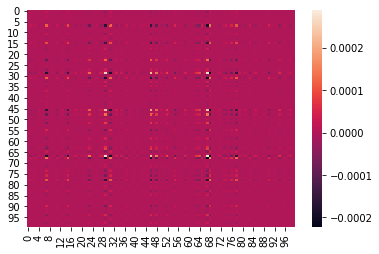

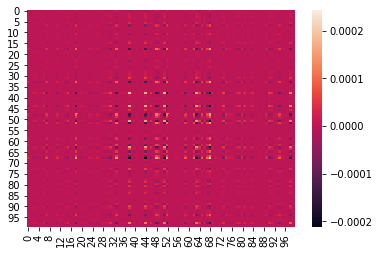

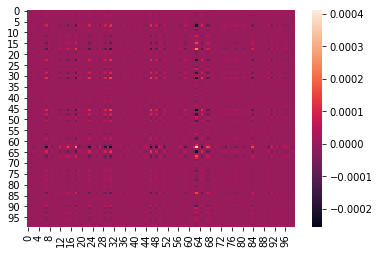

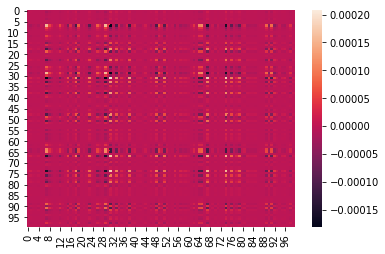

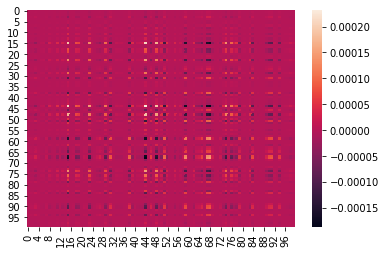

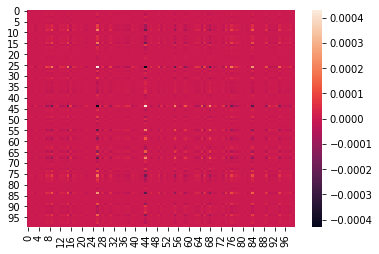

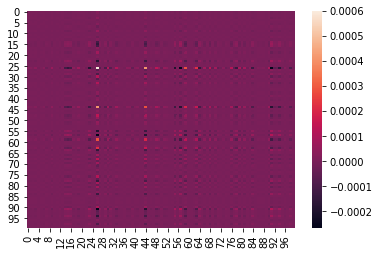

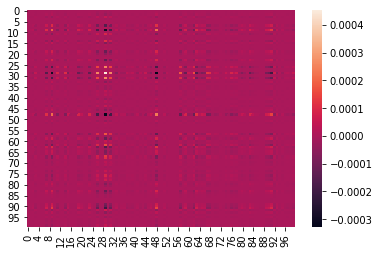

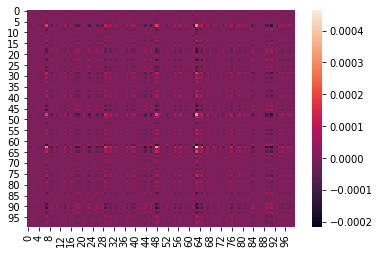

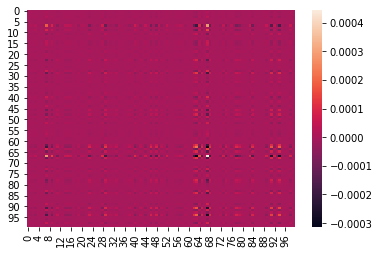

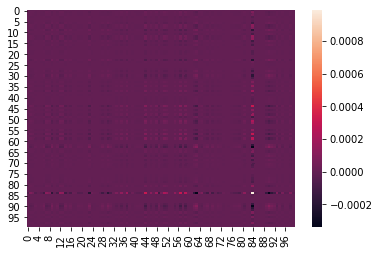

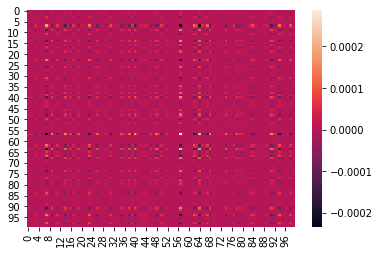

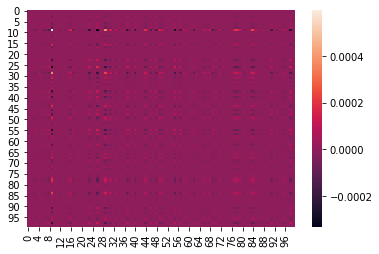

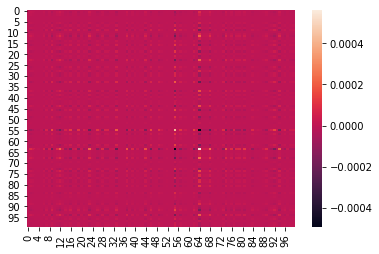

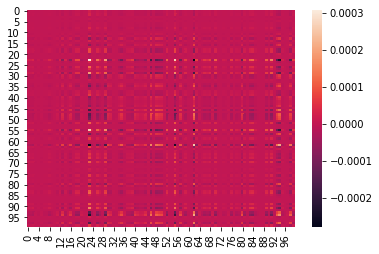

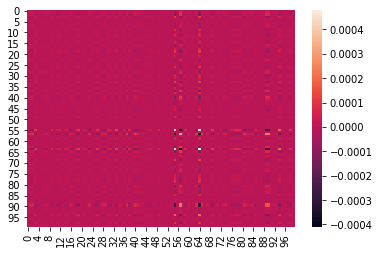

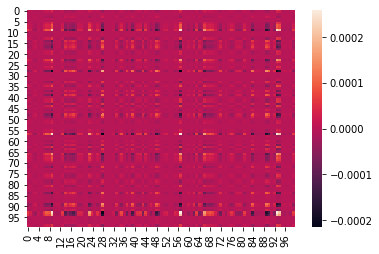

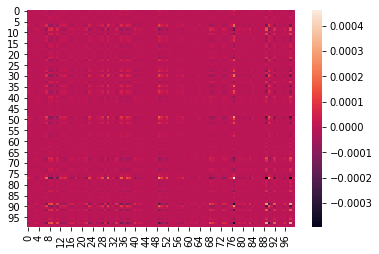

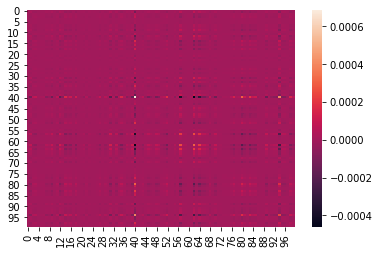

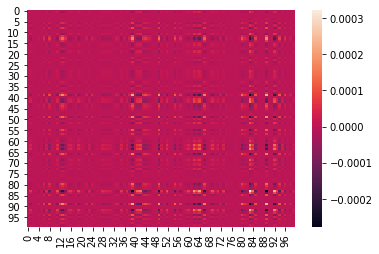

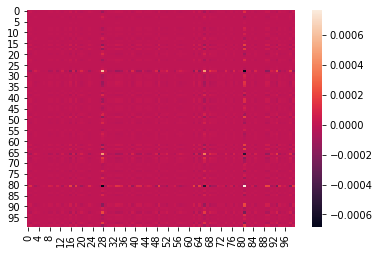

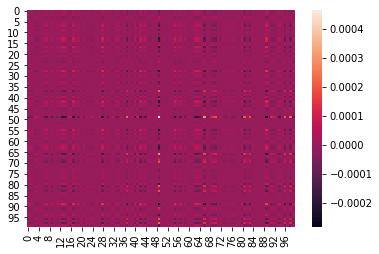

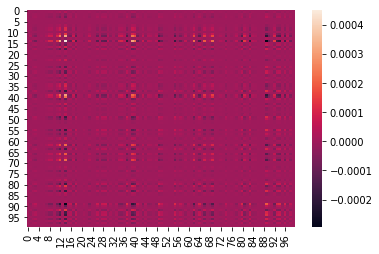

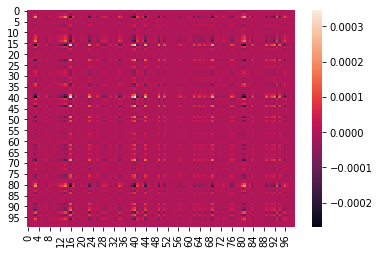

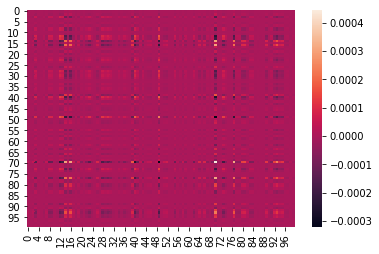

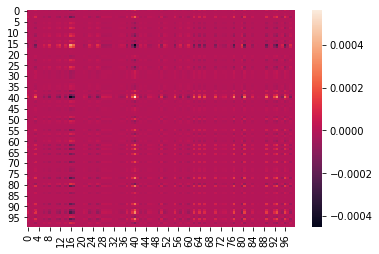

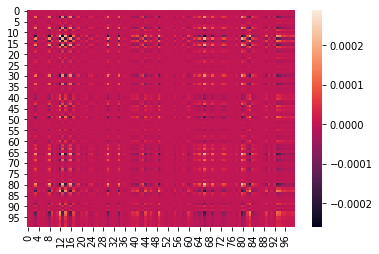

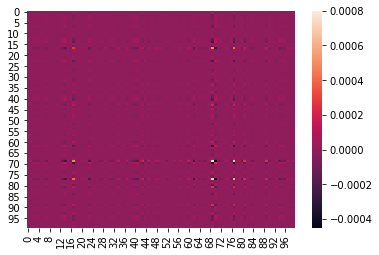

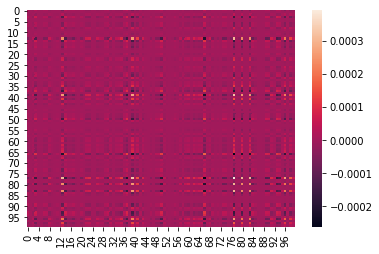

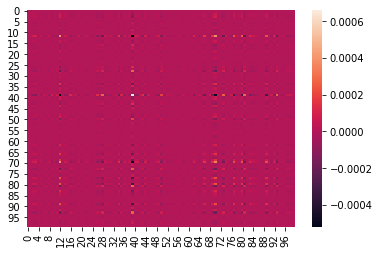

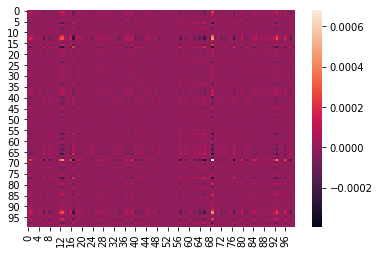

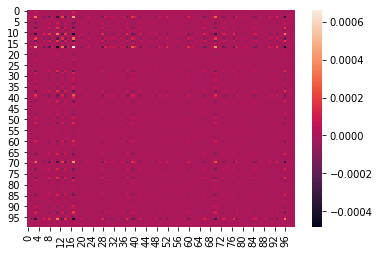

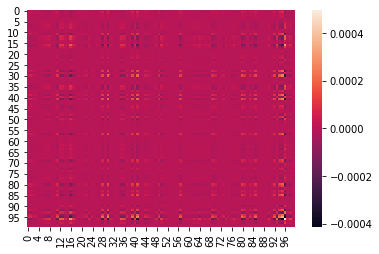

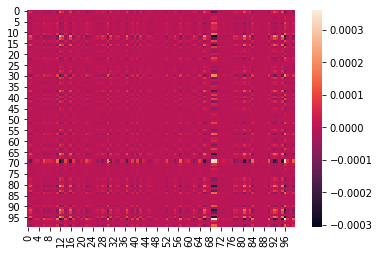

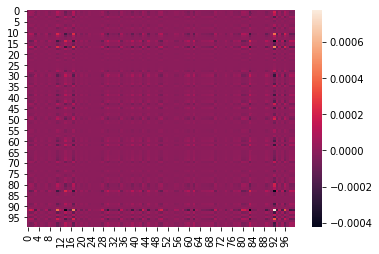

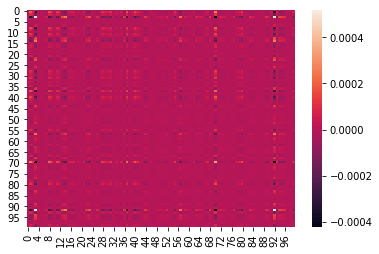

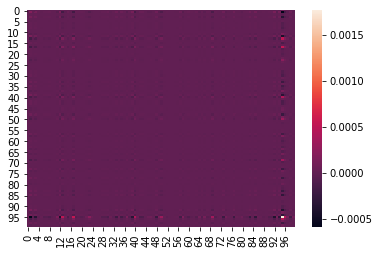

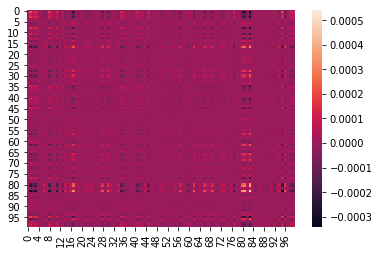

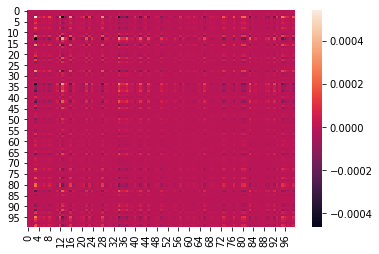

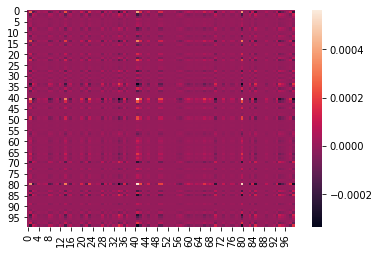

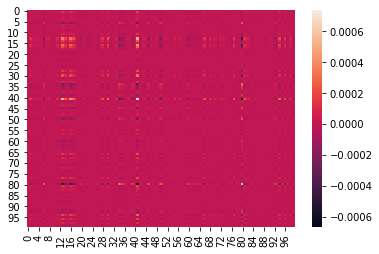

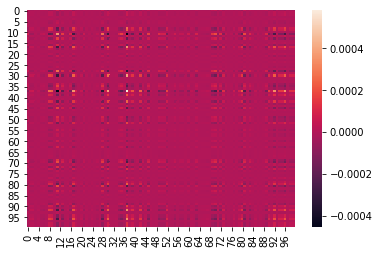

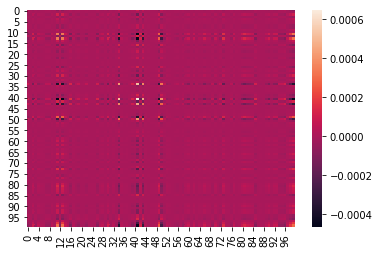

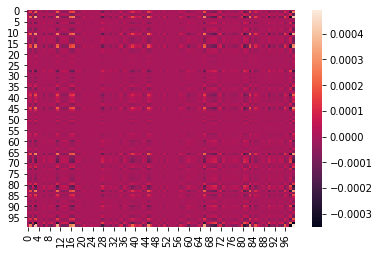

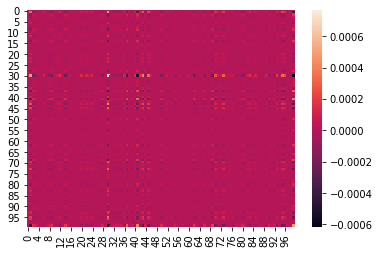

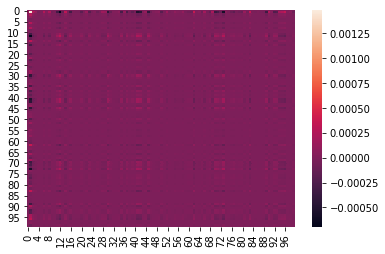

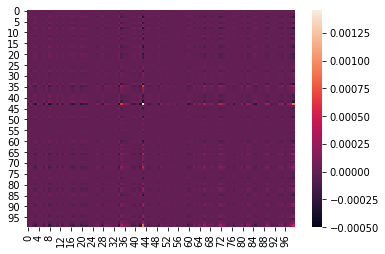

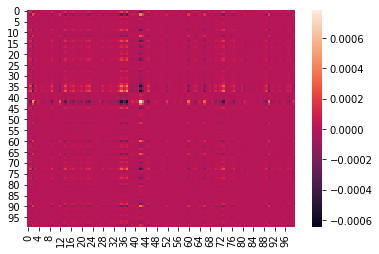

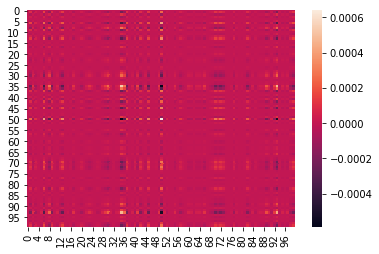

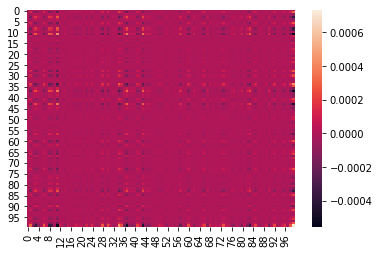

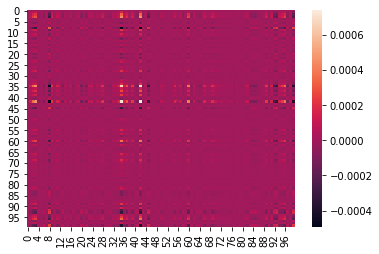

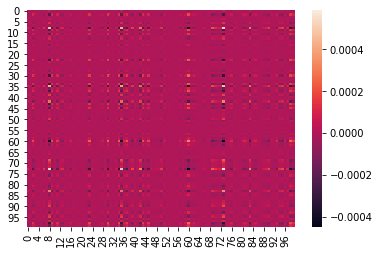

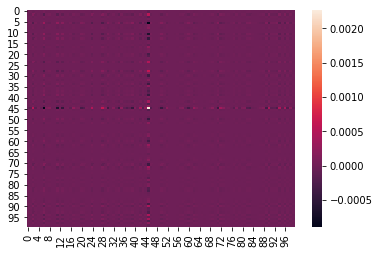

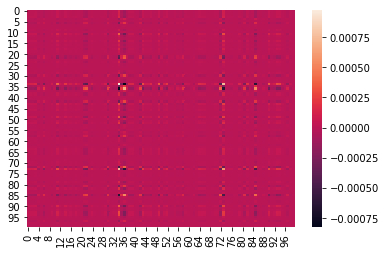

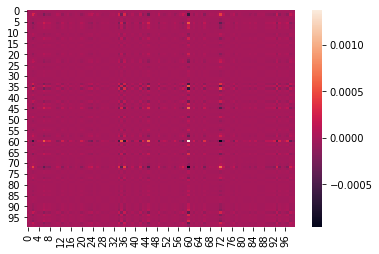

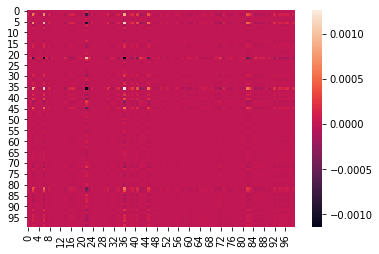

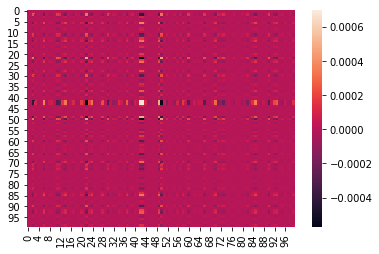

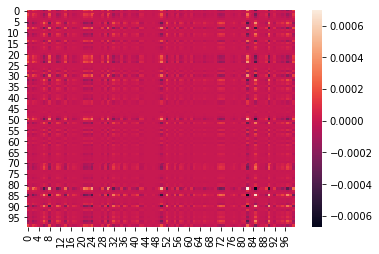

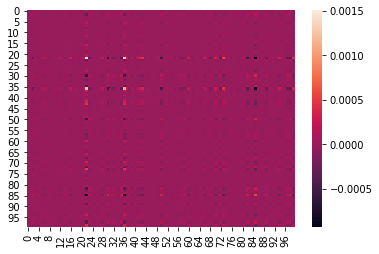

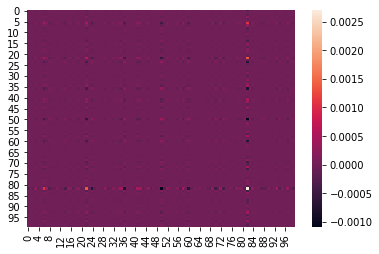

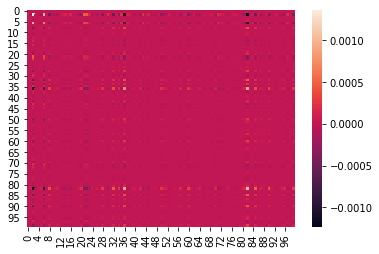

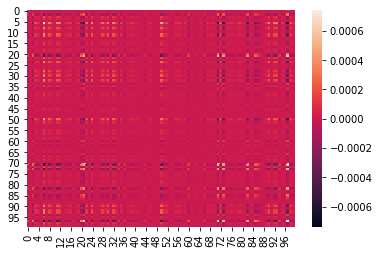

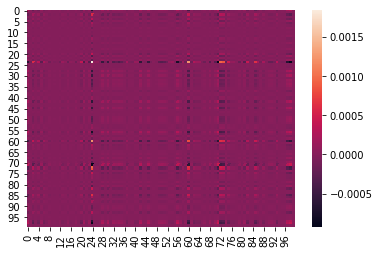

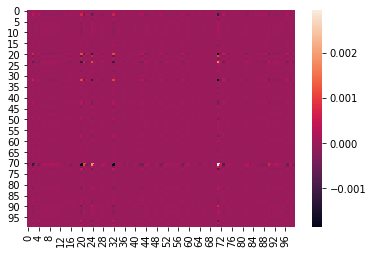

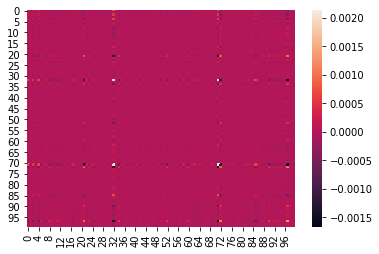

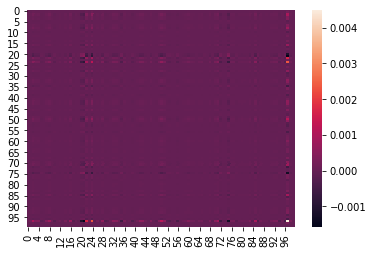

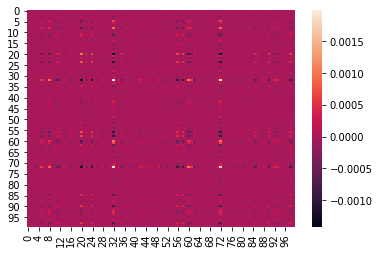

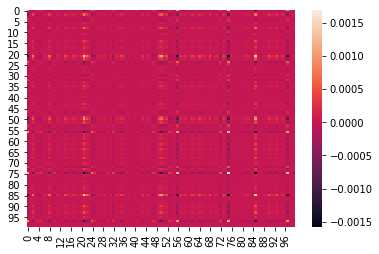

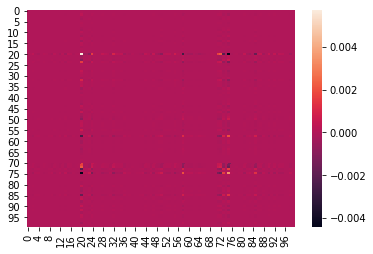

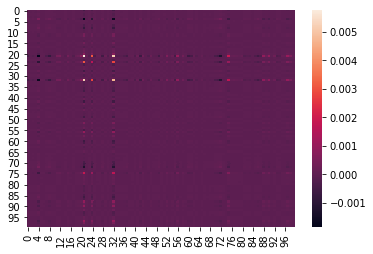

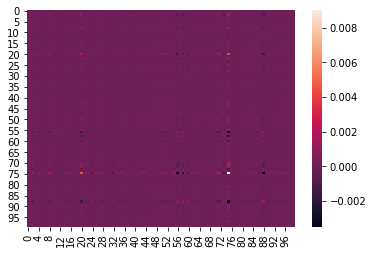

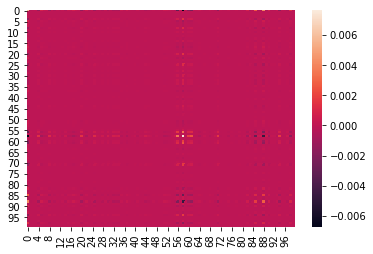

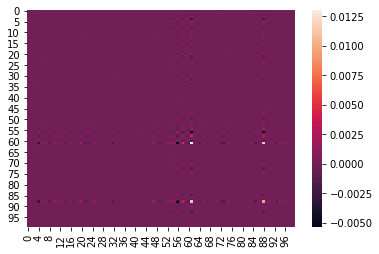

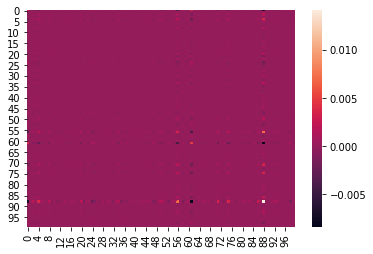

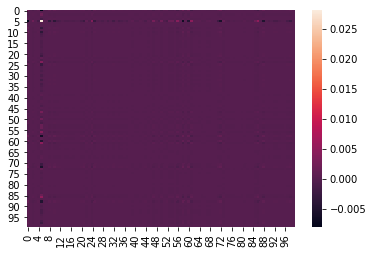

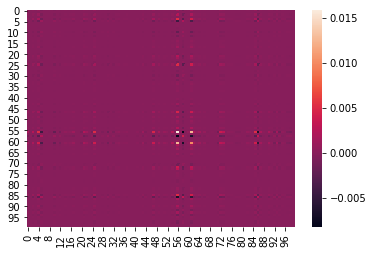

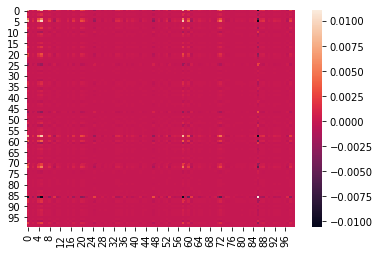

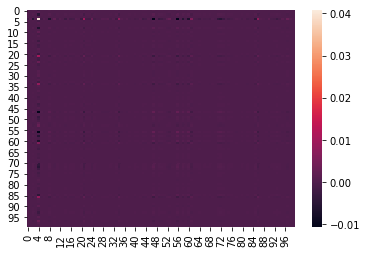

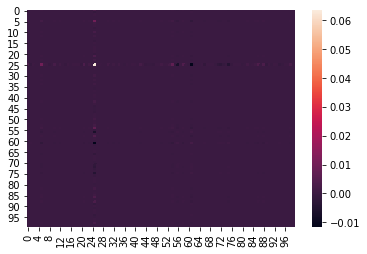

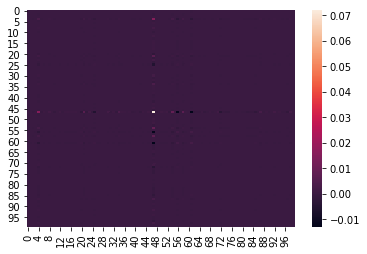

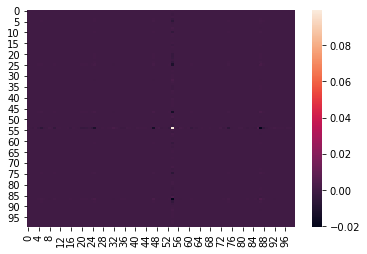

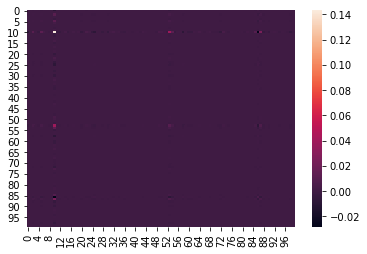

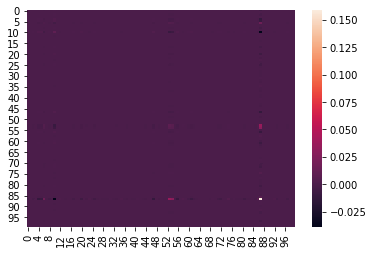

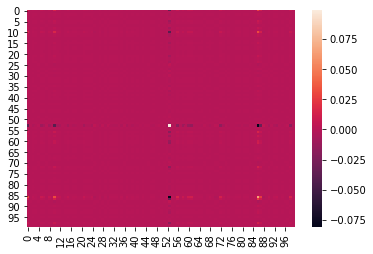

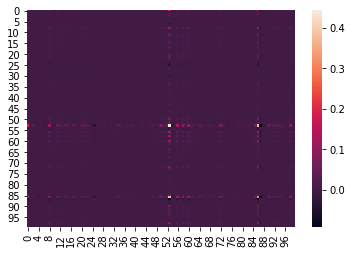

In [41]:
def return_eig_pieces(eigenvalues,eigenvectors):
    eig_covs=[]
    for j in range(0,100):
        one_piece=eigenvalues[j]*np.outer(eigenvectors[:,j].reshape(1,-1),eigenvectors[:,j].reshape(-1,1).T)
        #print(one_piece.shape)
        eig_covs.append(one_piece)
        sns.heatmap(one_piece)
        plt.show()
    return eig_covs
#sns.heatmap()
eig_covs=return_eig_pieces(eigenvalues,eigenvectors)

# Sample from eigenvalue pieces of the covariance matrix

In [76]:
def rank_one_cov_sample(eig_covs,ind):
    mean=[0]*100
    sample=np.random.multivariate_normal(mean,eig_covs[ind],200)
    pca=PCA(n_components=2)
    pcs=pca.fit_transform(sample)
    plt.scatter(pcs[:,0],pcs[:,1])
    plt.title('Rank one matrix, eigen index: '+str(ind))
    plt.show()
    
def rank_two_cov_sample(eig_covs,ind1,ind2):
    mean=[0]*100
    sample=np.random.multivariate_normal(mean,eig_covs[ind1]+eig_covs[ind2],200)
    pca=PCA(n_components=2)
    pcs=pca.fit_transform(sample)
    plt.scatter(pcs[:,0],pcs[:,1])
    plt.title('Rank two matrix, eigen indics: '+str(ind1)+', '+str(ind2))
    plt.show()

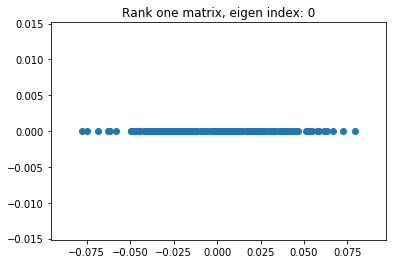

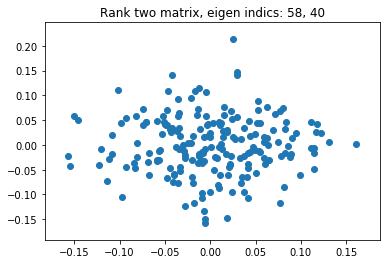

In [78]:
%matplotlib inline
rank_one_cov_sample(eig_covs,0)
rank_two_cov_sample(eig_covs,58,40)

# 3D plots

<IPython.core.display.Javascript object>


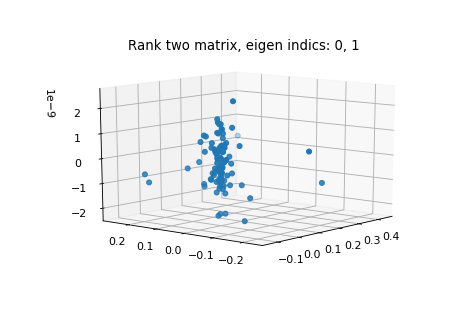

In [80]:
%matplotlib notebook
def rank_two_cov_sample_3d(eig_covs,ind1,ind2):
    mean=[0]*100
    sample=np.random.multivariate_normal(mean,eig_covs[ind1]+eig_covs[ind2],200).T
    pca=PCA(n_components=3)
    pcs=pca.fit_transform(sample)
    from mpl_toolkits.mplot3d import axes3d 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #plt.scatter(pcs[:,0],pcs[:,1],projection='3d')
    ax.scatter(pcs[:,0],pcs[:,1],pcs[:,2])
    plt.title('Rank two matrix, eigen indics: '+str(ind1)+', '+str(ind2))
    plt.show()
    
rank_two_cov_sample_3d(eig_covs,0,1)